This file was used to visualize and summarize the output from the frequency (in data_analysis) script.

In [ ]:
import xarray as xr
import numpy as np
import dask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [ ]:
#load frequency files
file1 = "/lustre/backup/WUR/ESG/gohin001/Data/frequency_historical_multiple_events.nc"
file2 = "/lustre/backup/WUR/ESG/gohin001/Data/frequency_ssp126_multiple_events.nc"
file3 = "/lustre/backup/WUR/ESG/gohin001/Data/frequency_ssp370_multiple_events.nc"
file4 = "/lustre/backup/WUR/ESG/gohin001/Data/frequency_ssp585_multiple_events.nc"
historical = xr.open_dataset(file1)
ssp126 = xr.open_dataset(file2)
ssp370 = xr.open_dataset(file3)
ssp585 = xr.open_dataset(file4)


In [ ]:
#load the drought_flood files to filter out <100m3/s discharge values.
file1 = "/lustre/backup/WUR/ESG/gohin001/Data/historical_flood_drought_dis>100.nc"
file2 = "/lustre/backup/WUR/ESG/gohin001/Data/ssp126_drought_flood_dis>100.nc"
file3 = "/lustre/backup/WUR/ESG/gohin001/Data/ssp370_drought_flood_dis>100.nc"
file4 = "/lustre/backup/WUR/ESG/gohin001/Data/ssp585_drought_flood_dis>100.nc"
historical_df = xr.open_dataset(file1)
ssp126_df = xr.open_dataset(file2)
ssp370_df = xr.open_dataset(file3)
ssp585_df = xr.open_dataset(file4)

historical['dis'] = historical_df['dis']
ssp126['dis'] = ssp126_df['dis']
ssp370['dis'] = ssp370_df['dis']
ssp585['dis'] = ssp585_df['dis']

historical['mask'] = historical['dis'].groupby("time.year").mean(dim="time", skipna=True).mean(dim="year") > 100
ssp126['mask'] = ssp126['dis'].groupby("time.year").mean(dim="time", skipna=True).mean(dim="year") > 100
ssp370['mask'] = ssp370['dis'].groupby("time.year").mean(dim="time", skipna=True).mean(dim="year") > 100
ssp585['mask'] = ssp585['dis'].groupby("time.year").mean(dim="time", skipna=True).mean(dim="year") > 100

In [ ]:
#compute mean frequency values

scenarios = [historical, ssp126, ssp370, ssp585]

for scenario in scenarios:
    DtoF = xr.where(scenario['mask'], scenario['n_DtoF_allD'], np.nan)
    print(DtoF.mean(skipna=True))
    DandF = xr.where(scenario['mask'], scenario['n_F&D'], np.nan)
    print(DandF.mean(skipna=True))
    FtoD = xr.where(scenario['mask'], scenario['n_FtoD_allD'], np.nan)
    print(FtoD.mean(skipna=True))


In [ ]:
### define regions
#North America
historical_NA = historical.sel(lat=slice(75, 15), lon=slice(-170, -50))
ssp126_NA = ssp126.sel(lat=slice(75, 15), lon=slice(-170, -50))
ssp370_NA = ssp370.sel(lat=slice(75, 15), lon=slice(-170, -50))

#South America
historical_SA = historical.sel(lat=slice(15, -60), lon=slice(-85, -30))
ssp126_SA = ssp126.sel(lat=slice(15, -60), lon=slice(-85, -30))
ssp370_SA = ssp370.sel(lat=slice(15, -60), lon=slice(-85, -30))

#Europe
historical_europe = historical.sel(lat=slice(72, 35), lon=slice(-25, 45))
ssp126_europe = ssp126.sel(lat=slice(72, 35), lon=slice(-25, 45))
ssp370_europe = ssp370.sel(lat=slice(72, 35), lon=slice(-25, 45))

#Subsahran Africa
historical_SSA = historical.sel(lat=slice(15, -35), lon=slice(-20, 55))
ssp126_SSA = ssp126.sel(lat=slice(15, -35), lon=slice(-20, 55))
ssp370_SSA = ssp370.sel(lat=slice(15, -35), lon=slice(-20, 55))

#NA/ME
historical_NA_ME = historical.sel(lat=slice(37, 15), lon=slice(-20, 60))
ssp126_NA_ME = ssp126.sel(lat=slice(37, 15), lon=slice(-20, 60))
ssp370_NA_ME = ssp370.sel(lat=slice(37, 15), lon=slice(-20, 60))

#central and northern Asia
historical_CNA = historical.sel(lat=slice(75, 35), lon=slice(40, 140))
ssp126_CNA = ssp126.sel(lat=slice(75, 35), lon=slice(40, 140))
ssp370_CNA = ssp370.sel(lat=slice(75, 35), lon=slice(40, 140))

#South East Asia
historical_SEA = historical.sel(lat=slice(35, -10), lon=slice(65, 135))
ssp126_SEA = ssp126.sel(lat=slice(35, -10), lon=slice(65, 135))
ssp370_SEA = ssp370.sel(lat=slice(35, -10), lon=slice(65, 135))

#Oceania
historical_Oce = historical.sel(lat=slice(0, -50), lon=slice(110, 180))
ssp126_Oce = ssp126.sel(lat=slice(0, -50), lon=slice(110, 180))
ssp370_Oce = ssp370.sel(lat=slice(0, -50), lon=slice(110, 180))                      

In [ ]:
#regional summaries
scenario_names = ["historical", "ssp126", "ssp370"]
regions = {
    "NA":        [historical_NA,  ssp126_NA,  ssp370_NA],
    "SA":        [historical_SA,  ssp126_SA,  ssp370_SA],
    "Europe":    [historical_europe, ssp126_europe, ssp370_europe],
    "SSA":       [historical_SSA, ssp126_SSA, ssp370_SSA],
    "NA_ME":     [historical_NA_ME, ssp126_NA_ME, ssp370_NA_ME],
    "CNA":       [historical_CNA,  ssp126_CNA,  ssp370_CNA],
    "SEA":       [historical_SEA,  ssp126_SEA,  ssp370_SEA],
    "Oce":       [historical_Oce,  ssp126_Oce,  ssp370_Oce]
}
for region_name, ds_list in regions.items():
    for sc_name, ds in zip(scenario_names, ds_list):
            
        dtof = xr.where(ds['mask'], ds['n_DtoF_allD'], np.nan).mean(skipna = True)
        ftod = xr.where(ds['mask'], ds['n_FtoD_allD'], np.nan).mean(skipna = True)
        dandf = xr.where(ds['mask'], ds['n_F&D'], np.nan).mean(skipna = True)
        
        print(f"{region_name:8s} | {sc_name:10s} | DtoF: {dtof:3.2f} | FtoD: {ftod:3.2f} | D&F: {dandf:3.2f}")


/tmp/ipykernel_1208382/1823967433.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.5)


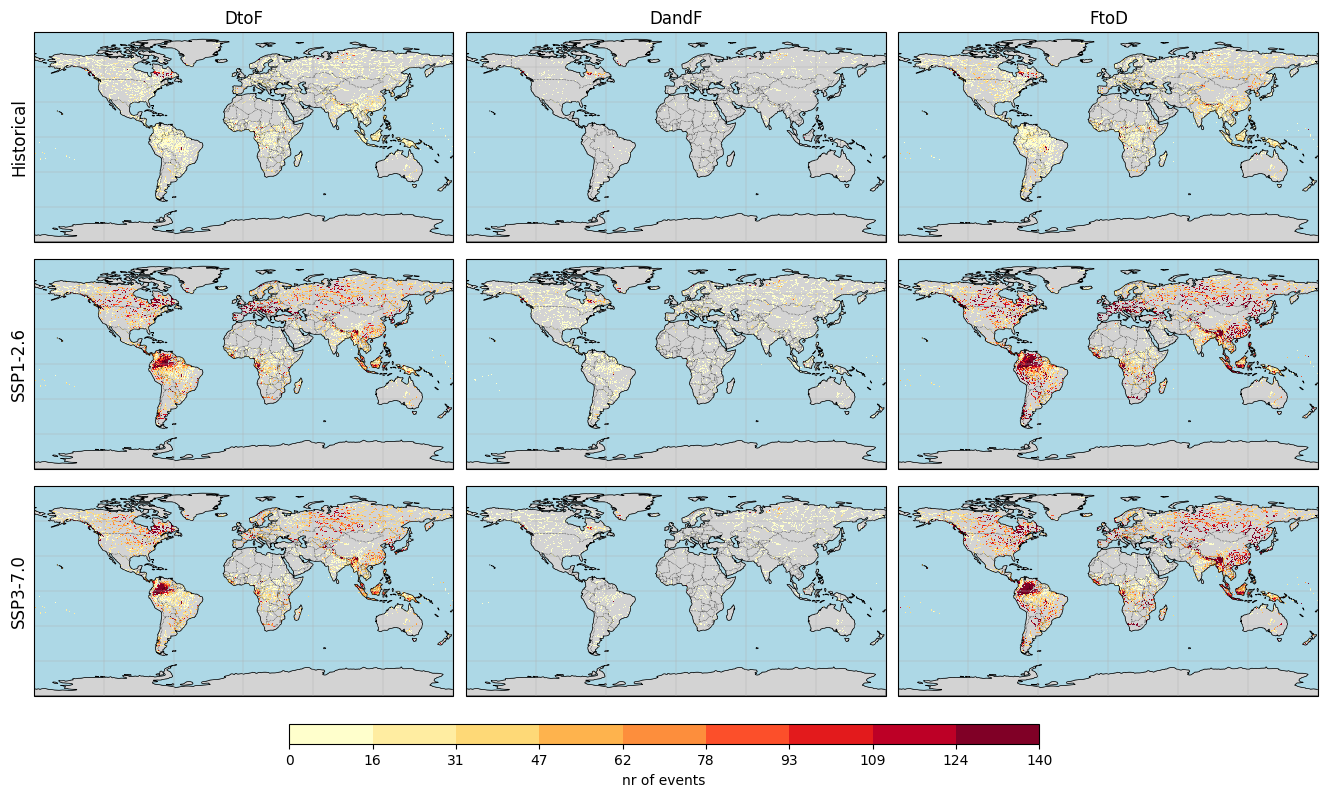

In [6]:
###make maps
# Define scenarios (already loaded)
scenarios = {
    "Historical": historical,
    "SSP1-2.6": ssp126,
    "SSP3-7.0": ssp370
}

# Define event types
event_types = ["DtoF", "DandF", "FtoD"]

# Colormap and normalization
cmap   = plt.cm.YlOrRd
bounds = np.linspace(0, 140, 10).round(0)
norm   = mcolors.BoundaryNorm(bounds, ncolors=cmap.N, clip=False)

# Create figure + subplots
fig, axes = plt.subplots(
    nrows=len(scenarios),
    ncols=len(event_types),
    figsize=(15, 10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

# Single colorbar axis
cbar_ax = fig.add_axes([0.2, 0.12, 0.5, 0.02])

for i, (scenario_name, ds) in enumerate(scenarios.items()):
    for j, ev in enumerate(event_types):
        ax = axes[i, j]

        # Select & mask
        if ev == "DtoF":
            da = ds["n_DtoF_allD"]
        elif ev == "DandF":
            da = ds["n_F&D"]
        else:  # FtoD
            da = ds["n_FtoD_allD"]

        data = da.where(da >= 1)

        # Build 2D lon/lat mesh
        lons = data["lon"].values
        lats = data["lat"].values
        Lon2d, Lat2d = np.meshgrid(lons, lats)

        # Map features
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4)
        ax.add_feature(cfeature.LAND,
                       facecolor="lightgray",
                       edgecolor="black",
                       linewidth=0.3)
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

        # pcolormesh with nearest-neighbor shading
        img = ax.pcolormesh(
            Lon2d, Lat2d, data.values,
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            norm=norm,
            shading="nearest",
            rasterized=True
        )

        # Titles
        if i == 0:
            ax.set_title(ev, fontsize=12)
        if j == 0:
            ax.set_ylabel(scenario_name, fontsize=12)

        # Clean up axes
        ax.set_xticks([])
        ax.set_yticks([])
        ax.gridlines(linewidth=0.3, draw_labels=False)

# Colorbar
fig.colorbar(img, cax=cbar_ax, ticks=bounds, location = "bottom", label="nr of events")

plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.5)
plt.subplots_adjust(wspace=0.03, hspace=-0.55)

plt.savefig("CFD_frequency.png", dpi=300, bbox_inches="tight")
plt.show()


In [23]:
for scenario in scenarios:
    DtoF = xr.where(scenario['n_DtoF_SMDonly'] >= 1, scenario['n_DtoF_SMDonly'], np.nan)
    print(DtoF.max(skipna=True))
    FtoD = xr.where(scenario['n_FtoD_SMDonly'] >= 1, scenario['n_FtoD_SMDonly'], np.nan)
    print(FtoD.mean(skipna=True))

<xarray.DataArray 'n_DtoF_SMDonly' ()> Size: 8B
array(13.5789301)
Coordinates:
    quantile  float64 8B 0.15
<xarray.DataArray 'n_FtoD_SMDonly' ()> Size: 8B
array(16.33962121)
Coordinates:
    quantile  float64 8B 0.15
<xarray.DataArray 'n_DtoF_SMDonly' ()> Size: 8B
array(45.5895288)
Coordinates:
    quantile  float64 8B 0.15
<xarray.DataArray 'n_FtoD_SMDonly' ()> Size: 8B
array(58.0563856)
Coordinates:
    quantile  float64 8B 0.15
<xarray.DataArray 'n_DtoF_SMDonly' ()> Size: 8B
array(33.10384323)
Coordinates:
    quantile  float64 8B 0.15
<xarray.DataArray 'n_FtoD_SMDonly' ()> Size: 8B
array(44.51449128)
Coordinates:
    quantile  float64 8B 0.15


In [11]:
### regions
#North America
historical_NA = historical.sel(lat=slice(75, 15), lon=slice(-170, -50))
ssp126_NA = ssp126.sel(lat=slice(75, 15), lon=slice(-170, -50))
ssp370_NA = ssp370.sel(lat=slice(75, 15), lon=slice(-170, -50))

#South America
historical_SA = historical.sel(lat=slice(15, -60), lon=slice(-85, -30))
ssp126_SA = ssp126.sel(lat=slice(15, -60), lon=slice(-85, -30))
ssp370_SA = ssp370.sel(lat=slice(15, -60), lon=slice(-85, -30))

#Europe
historical_europe = historical.sel(lat=slice(72, 35), lon=slice(-25, 45))
ssp126_europe = ssp126.sel(lat=slice(72, 35), lon=slice(-25, 45))
ssp370_europe = ssp370.sel(lat=slice(72, 35), lon=slice(-25, 45))

#Subsahran Africa
historical_SSA = historical.sel(lat=slice(15, -35), lon=slice(-20, 55))
ssp126_SSA = ssp126.sel(lat=slice(15, -35), lon=slice(-20, 55))
ssp370_SSA = ssp370.sel(lat=slice(15, -35), lon=slice(-20, 55))

#NA/ME
historical_NA_ME = historical.sel(lat=slice(37, 15), lon=slice(-20, 60))
ssp126_NA_ME = ssp126.sel(lat=slice(37, 15), lon=slice(-20, 60))
ssp370_NA_ME = ssp370.sel(lat=slice(37, 15), lon=slice(-20, 60))

#central and northern Asia
historical_CNA = historical.sel(lat=slice(75, 35), lon=slice(40, 140))
ssp126_CNA = ssp126.sel(lat=slice(75, 35), lon=slice(40, 140))
ssp370_CNA = ssp370.sel(lat=slice(75, 35), lon=slice(40, 140))

#South East Asia
historical_SEA = historical.sel(lat=slice(35, -10), lon=slice(65, 135))
ssp126_SEA = ssp126.sel(lat=slice(35, -10), lon=slice(65, 135))
ssp370_SEA = ssp370.sel(lat=slice(35, -10), lon=slice(65, 135))

#Oceania
historical_Oce = historical.sel(lat=slice(0, -50), lon=slice(110, 180))
ssp126_Oce = ssp126.sel(lat=slice(0, -50), lon=slice(110, 180))
ssp370_Oce = ssp370.sel(lat=slice(0, -50), lon=slice(110, 180))                      

In [13]:
scenario_names = ["historical", "ssp126", "ssp370"]
regions = {
    "NA":        [historical_NA,  ssp126_NA,  ssp370_NA],
    "SA":        [historical_SA,  ssp126_SA,  ssp370_SA],
    "Europe":    [historical_europe, ssp126_europe, ssp370_europe],
    "SSA":       [historical_SSA, ssp126_SSA, ssp370_SSA],
    "NA_ME":     [historical_NA_ME, ssp126_NA_ME, ssp370_NA_ME],
    "CNA":       [historical_CNA,  ssp126_CNA,  ssp370_CNA],
    "SEA":       [historical_SEA,  ssp126_SEA,  ssp370_SEA],
    "Oce":       [historical_Oce,  ssp126_Oce,  ssp370_Oce]
}
for region_name, ds_list in regions.items():
    for sc_name, ds in zip(scenario_names, ds_list):
            
        dtof = xr.where(ds['mask'], ds['n_DtoF_allD'], np.nan).mean(skipna = True)
        ftod = xr.where(ds['mask'], ds['n_FtoD_allD'], np.nan).mean(skipna = True)
        dandf = xr.where(ds['mask'], ds['n_F&D'], np.nan).mean(skipna = True)
        
        print(f"{region_name:8s} | {sc_name:10s} | DtoF: {dtof:3.2f} | FtoD: {ftod:3.2f} | D&F: {dandf:3.2f}")


NA       | historical | DtoF: 20.87 | FtoD: 22.68 | D&F: 5.19
NA       | ssp126     | DtoF: 67.89 | FtoD: 74.85 | D&F: 11.51
NA       | ssp370     | DtoF: 59.71 | FtoD: 74.17 | D&F: 5.13
SA       | historical | DtoF: 9.51 | FtoD: 13.26 | D&F: 0.76
SA       | ssp126     | DtoF: 61.72 | FtoD: 93.37 | D&F: 4.27
SA       | ssp370     | DtoF: 51.35 | FtoD: 82.92 | D&F: 1.00
Europe   | historical | DtoF: 11.36 | FtoD: 15.31 | D&F: 0.78
Europe   | ssp126     | DtoF: 76.57 | FtoD: 92.17 | D&F: 8.67
Europe   | ssp370     | DtoF: 38.07 | FtoD: 52.10 | D&F: 1.28
SSA      | historical | DtoF: 14.34 | FtoD: 19.85 | D&F: 1.25
SSA      | ssp126     | DtoF: 29.42 | FtoD: 44.36 | D&F: 2.45
SSA      | ssp370     | DtoF: 23.24 | FtoD: 38.81 | D&F: 1.16
NA_ME    | historical | DtoF: 4.09 | FtoD: 6.35 | D&F: 1.10
NA_ME    | ssp126     | DtoF: 10.75 | FtoD: 10.92 | D&F: 5.25
NA_ME    | ssp370     | DtoF: 3.82 | FtoD: 4.69 | D&F: 1.13
CNA      | historical | DtoF: 10.73 | FtoD: 20.26 | D&F: 1.40
CNA      | s

In [3]:

import pandas as pd

def melt_event_counts(da, region_name, scenario_name):
    """
    Convert an xarray.Dataset with event counts into a long-format DataFrame,
    filtering out all-NaN pixels before conversion to save memory.
    """
    da = da[['n_DtoF_allD', 'n_FtoD_allD', 'n_F&D']]
    # Mask: drop all grid cells where all values (DtoF, FtoD, D&F) are NaN
    valid_mask = ~np.isnan(da.to_array().sum(dim="variable"))
    da_filtered = da.where(valid_mask)
    # Now convert to DataFrame
    df = da_filtered.to_dataframe().dropna(how='all').reset_index()

    # Add metadata
    df['region'] = region_name
    df['scenario'] = scenario_name

    return df



In [21]:

# North America
dfs.append(melt_event_counts(historical_NA, "North America", "historical"))
dfs.append(melt_event_counts(ssp126_NA, "North America", "ssp126"))
dfs.append(melt_event_counts(ssp370_NA, "North America", "ssp370"))

# South America
dfs.append(melt_event_counts(historical_SA, "South America", "historical"))
dfs.append(melt_event_counts(ssp126_SA, "South America", "ssp126"))
dfs.append(melt_event_counts(ssp370_SA, "South America", "ssp370"))

#Europe

dfs.append(melt_event_counts(historical_europe, "Europe", "historical"))
dfs.append(melt_event_counts(ssp126_europe, "Europe", "ssp126"))
dfs.append(melt_event_counts(ssp370_europe, "Europe", "ssp370"))

#SUbsahran Africa
dfs.append(melt_event_counts(historical_SSA, "SSA", "historical"))
dfs.append(melt_event_counts(ssp126_SSA, "SSA", "ssp126"))
dfs.append(melt_event_counts(ssp370_SSA, "SSA", "ssp370"))

#Northern Africa/middle east
dfs.append(melt_event_counts(historical_NA_ME, "NA/ME", "historical"))
dfs.append(melt_event_counts(ssp126_NA_ME, "NA/ME", "ssp126"))
dfs.append(melt_event_counts(ssp370_NA_ME, "NA/ME", "ssp370"))

#Central and nothern Asia
dfs.append(melt_event_counts(historical_CNA, "CNA", "historical"))
dfs.append(melt_event_counts(ssp126_CNA, "CNA", "ssp126"))
dfs.append(melt_event_counts(ssp370_CNA, "CNA", "ssp370"))

#South East Asia
dfs.append(melt_event_counts(historical_SEA, "SEA", "historical"))
dfs.append(melt_event_counts(ssp126_SEA, "SEA", "ssp126"))
dfs.append(melt_event_counts(ssp370_SEA, "SEA", "ssp370"))

#Oceania
dfs.append(melt_event_counts(historical_Oce, "Oceania", "historical"))
dfs.append(melt_event_counts(ssp126_Oce, "Oceania", "ssp126"))
dfs.append(melt_event_counts(ssp370_Oce, "Oceania", "ssp370"))

# Combine all into one big DataFrame
all_event_df = pd.concat(dfs, ignore_index=True)
group_keys = ['lat', 'lon']  # Modify based on your actual cell identifier

# Create masks for each event type
mask_dtof = all_event_df.groupby(group_keys)['n_DtoF_allD'].transform('max') > 0
mask_ftod = all_event_df.groupby(group_keys)['n_FtoD_allD'].transform('max') > 0
mask_fd = all_event_df.groupby(group_keys)['n_F&D'].transform('max') > 0

# Calculate means using the respective masks
print(all_event_df[mask_dtof].groupby(['region', 'scenario'])['n_DtoF_allD'].mean(numeric_only=True))
print(all_event_df[mask_ftod].groupby(['region', 'scenario'])['n_FtoD_allD'].mean(numeric_only=True))
print(all_event_df[mask_fd].groupby(['region', 'scenario'])['n_F&D'].mean(numeric_only=True))


region         scenario  
CNA            historical    10.748689
               ssp126        57.919609
               ssp370        52.558895
Europe         historical    11.400806
               ssp126        74.033871
               ssp370        33.645161
NA/ME          historical     5.104592
               ssp126        14.566327
               ssp370         5.459184
North America  historical    20.937332
               ssp126        68.344169
               ssp370        58.729223
Oceania        historical    14.834839
               ssp126        36.677419
               ssp370        37.178065
SEA            historical    16.357143
               ssp126        44.707063
               ssp370        41.255217
SSA            historical    14.621378
               ssp126        29.935392
               ssp370        23.539667
South America  historical     9.603414
               ssp126        59.505689
               ssp370        45.730589
Name: n_DtoF_allD, dtype: float64
regi

In [118]:
long_df = pd.melt(
    all_event_df,
    id_vars=['lat', 'lon', 'region', 'scenario'],
    value_vars=['n_DtoF_allD', 'n_FtoD_allD', 'n_F&D'],
    var_name='event_type',
    value_name='count')


#long_df.groupby(['region', 'scenario', 'event_type']).mean(numeric_only=True)

long_df.groupby(['region', 'scenario'])['count'].mean(numeric_only=True)

region         scenario  
CNA            historical    1.663083
               ssp126        7.459625
               ssp370        6.670500
Europe         historical    0.818243
               ssp126        5.719755
               ssp370        2.526834
NA/ME          historical    0.251231
               ssp126        0.690767
               ssp370        0.257860
North America  historical    1.481644
               ssp126        4.772049
               ssp370        4.772049
Oceania        historical    0.516976
               ssp126        1.405595
               ssp370        1.367643
SEA            historical    2.288069
               ssp126        7.725079
               ssp370        6.965688
SSA            historical    1.464533
               ssp126        3.234956
               ssp370        2.575267
South America  historical    1.108182
               ssp126        7.797111
               ssp370        7.797111
Name: count, dtype: float64